In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [27]:
def modified_euler(u_start, t_start, t_end, f, t_delta):
    """
    u(t_start) = u_start
    f: u' = f(u)
    """
    u_prev = u_start
    u = [u_prev]
    
    # t values
    steps = np.arange(t_start, t_end + t_delta, t_delta)
    
    for ti in steps:
        u_next_euler = (f(u_prev) * t_delta) + u_prev
        avg_slope = (f(u_next_euler) + f(u_prev)) / 2
        ui = (avg_slope * t_delta) + u_prev
        u_prev = ui
        
        u.append(ui)

    return steps, np.array(u[:-1])

In [62]:
def part1_problem1():
    starting = [(1, 1, 8),
                (1.01, 1, 8),
                (1.0001, 1, 8),
                (1.000001, 1, 8)]
    
    lorenz = lambda rho, sigma, beta: \
                lambda x: np.array([sigma * (x[1] - x[0]), 
                                    rho * x[0] - x[1] - x[0] * x[2],
                                    -beta * x[2] + x[0] * x[1]])
    
    # x is 3 dim
    for pt in starting:
        t, coords = modified_euler(pt, 0, 50, lorenz(28, 10, 8/3), 1/1000)
        x = coords[:,0]
    
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.plot(t, x)

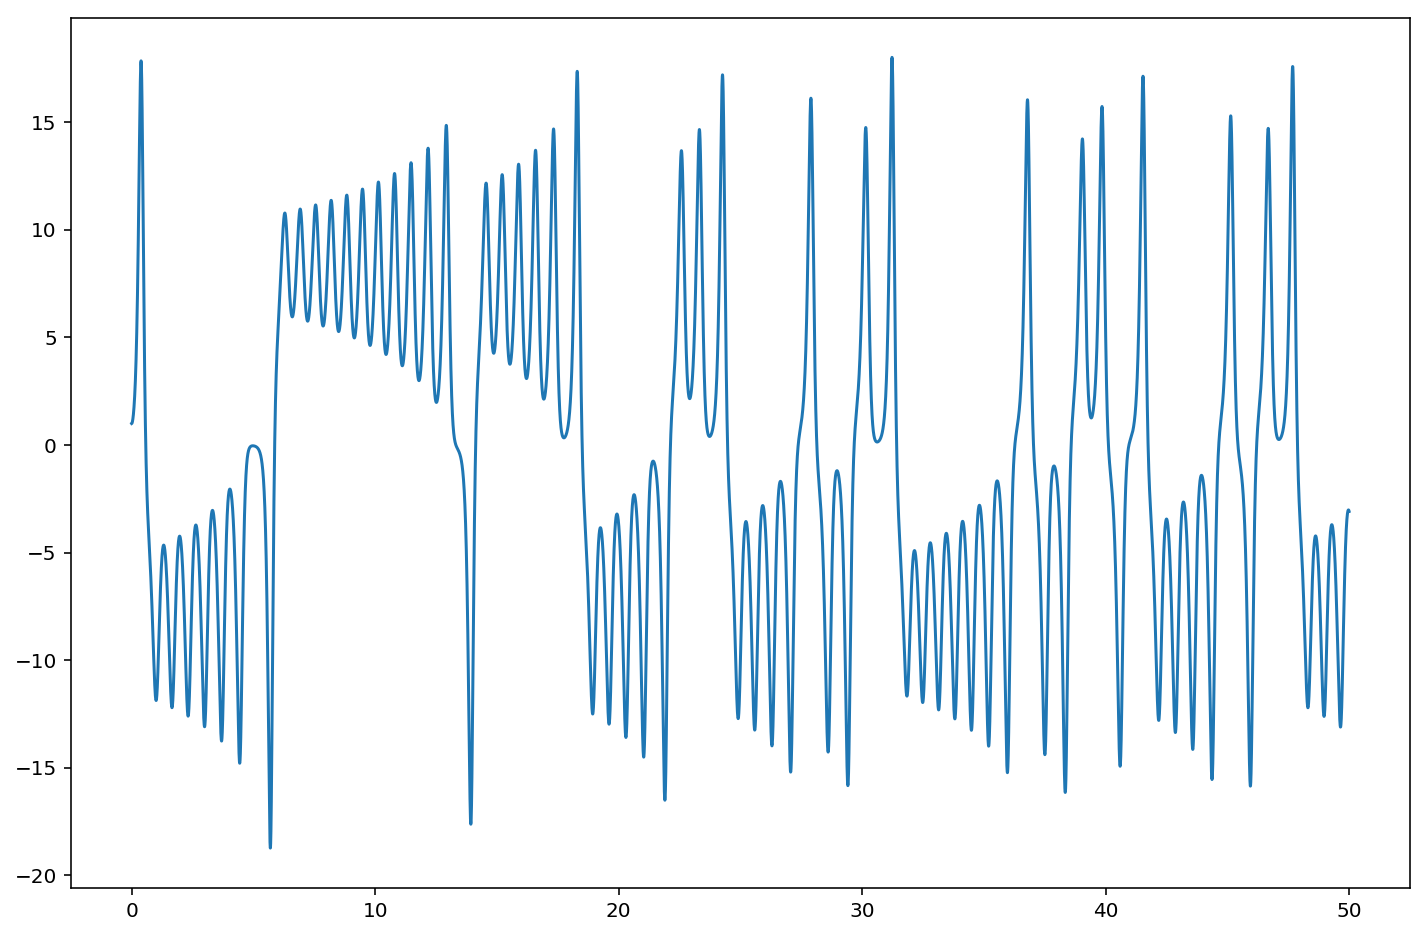

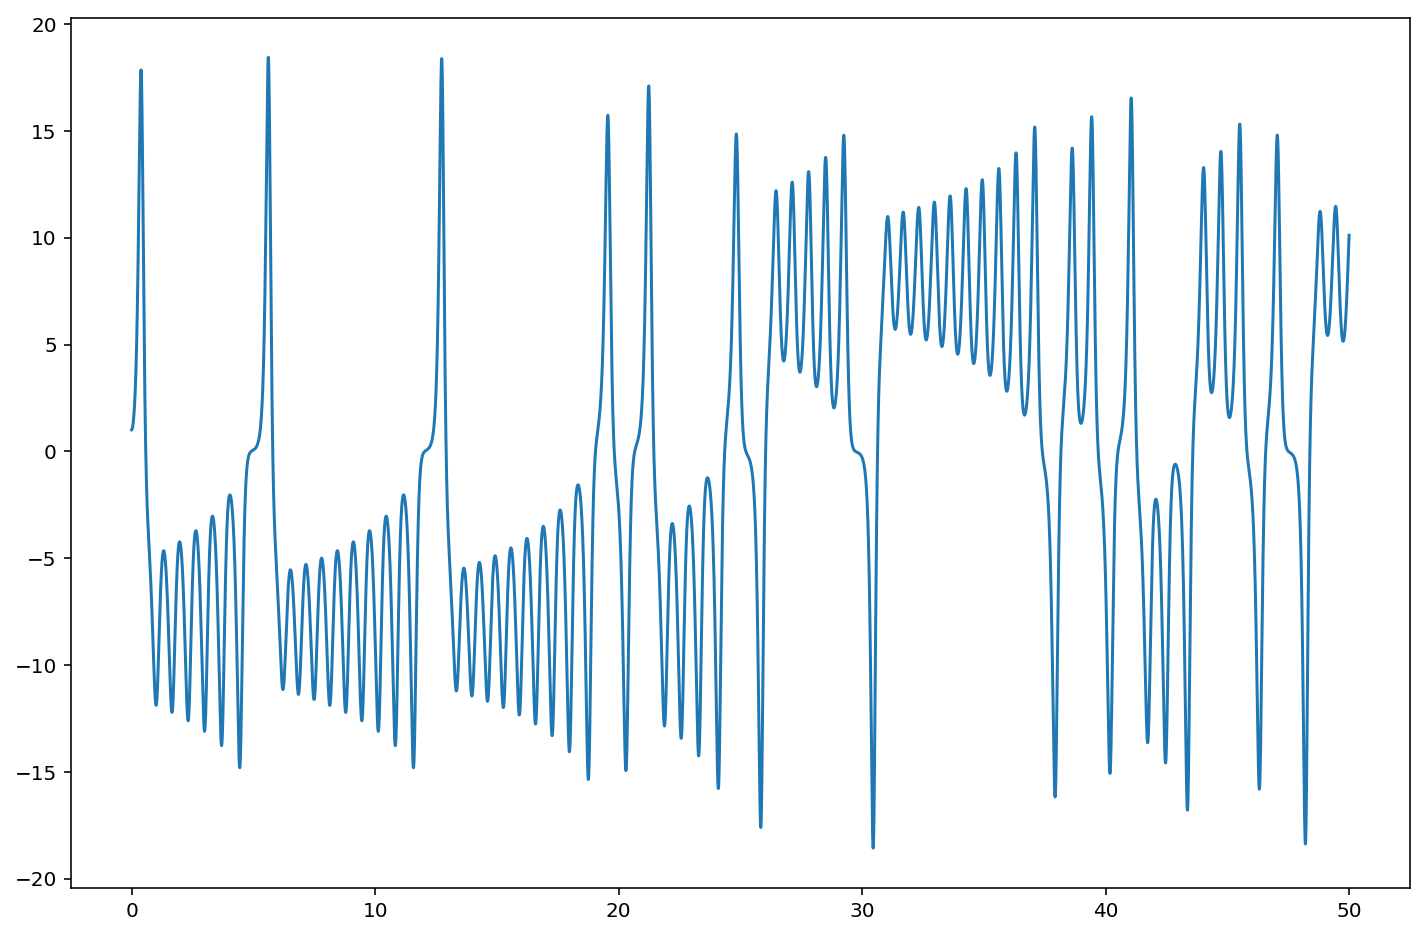

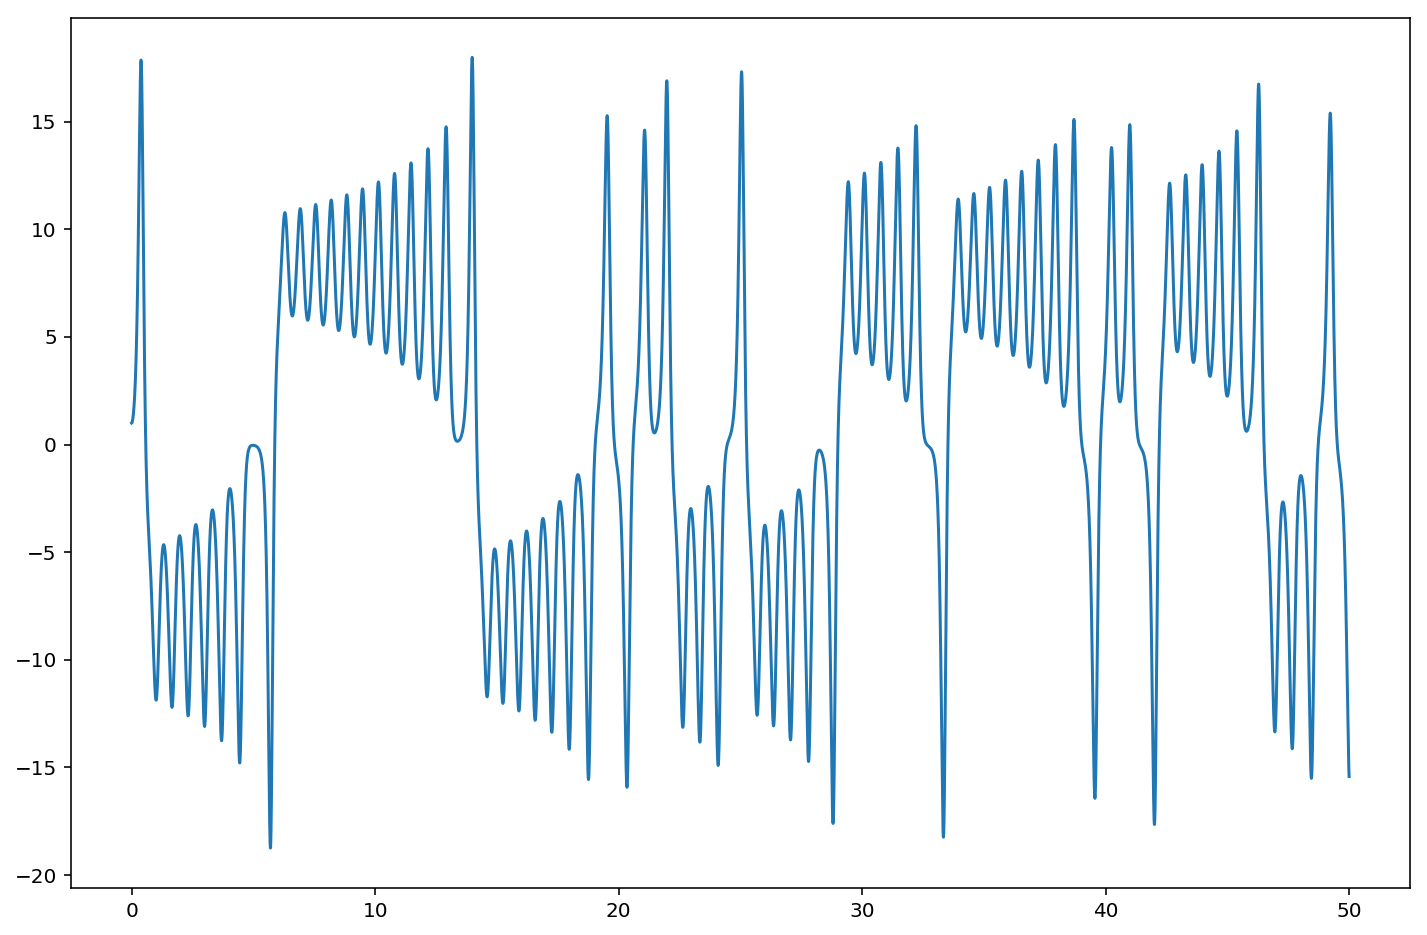

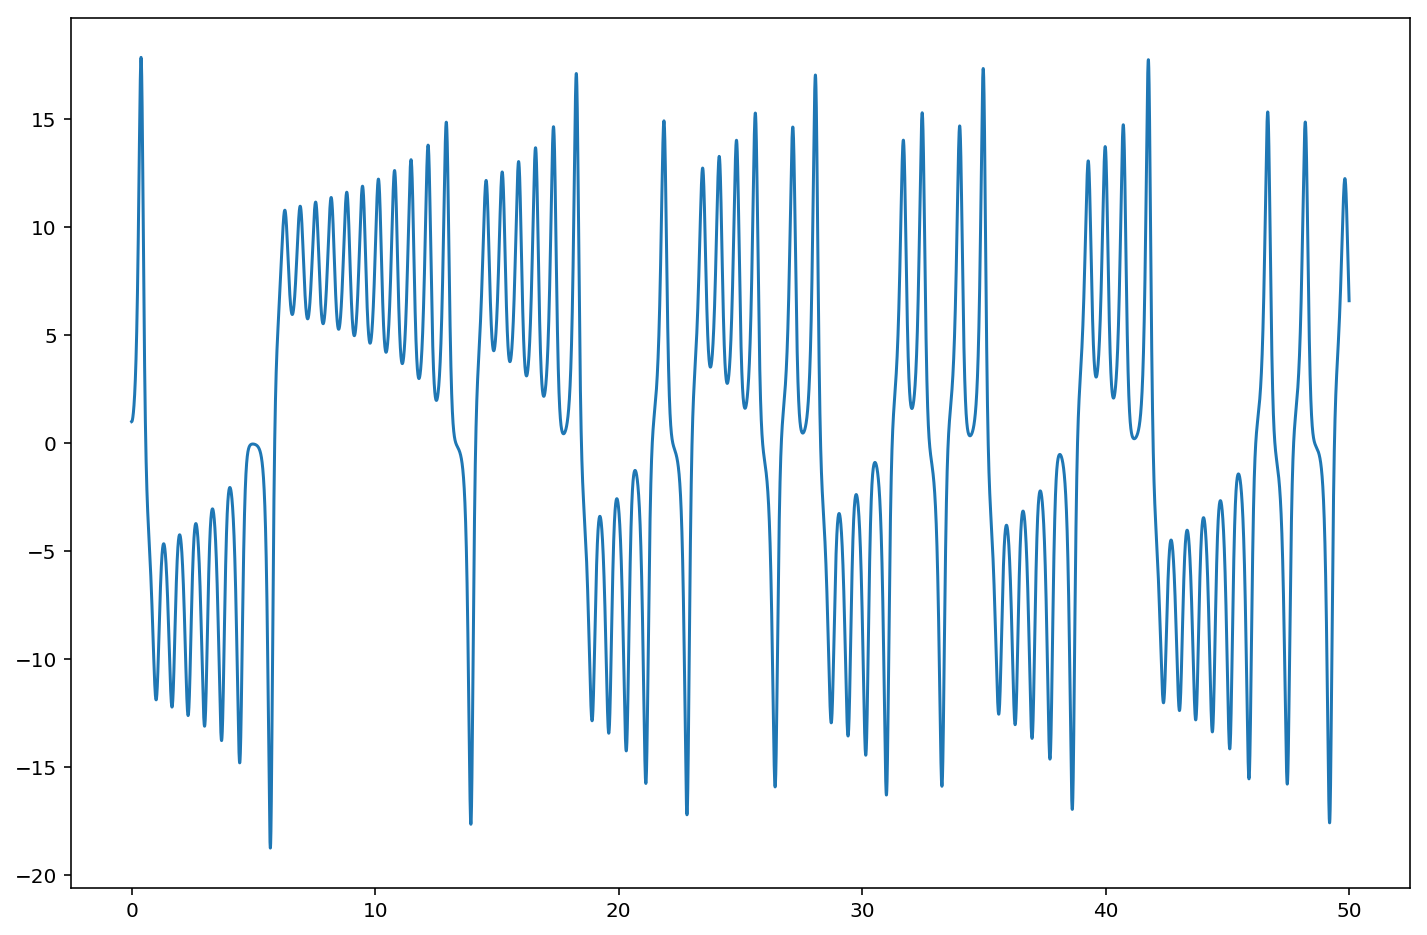

In [63]:
part1_problem1()

In [70]:
def part1_problem2():
    starting = [(1, 1, 8),
                (1.01, 1, 8)]
    
    lorenz = lambda rho, sigma, beta: \
                lambda x: np.array([sigma * (x[1] - x[0]), 
                                    rho * x[0] - x[1] - x[0] * x[2],
                                    -beta * x[2] + x[0] * x[1]])
    
    # x is 3 dim
    for pt in starting:
        t, coords = modified_euler(pt, 0, 50, lorenz(15, 10, 8/3), 1/1000)
        x = coords[:,0]
    
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.plot(t, x)

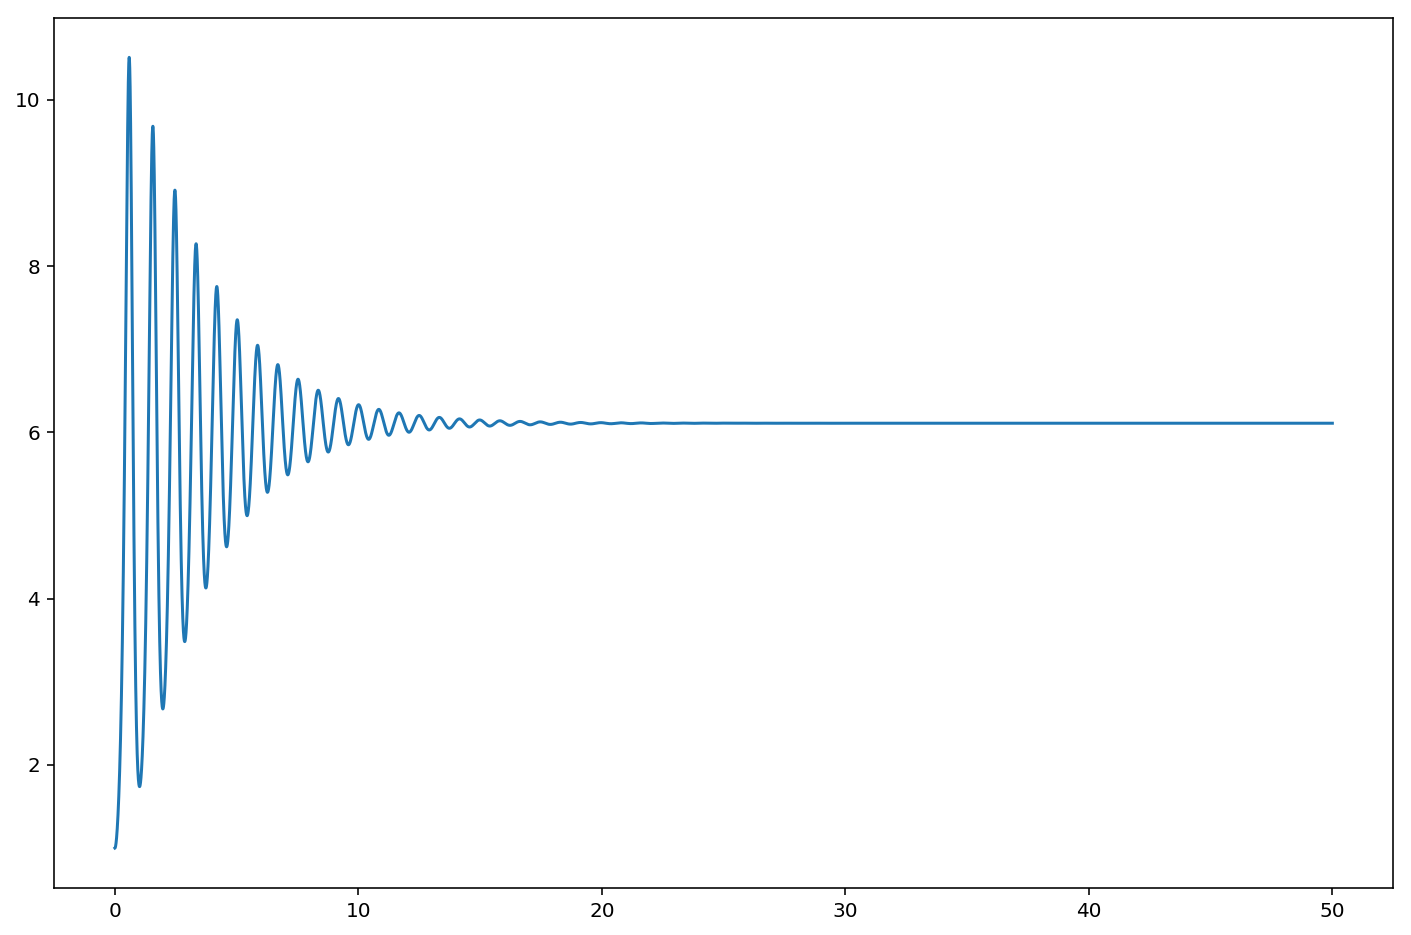

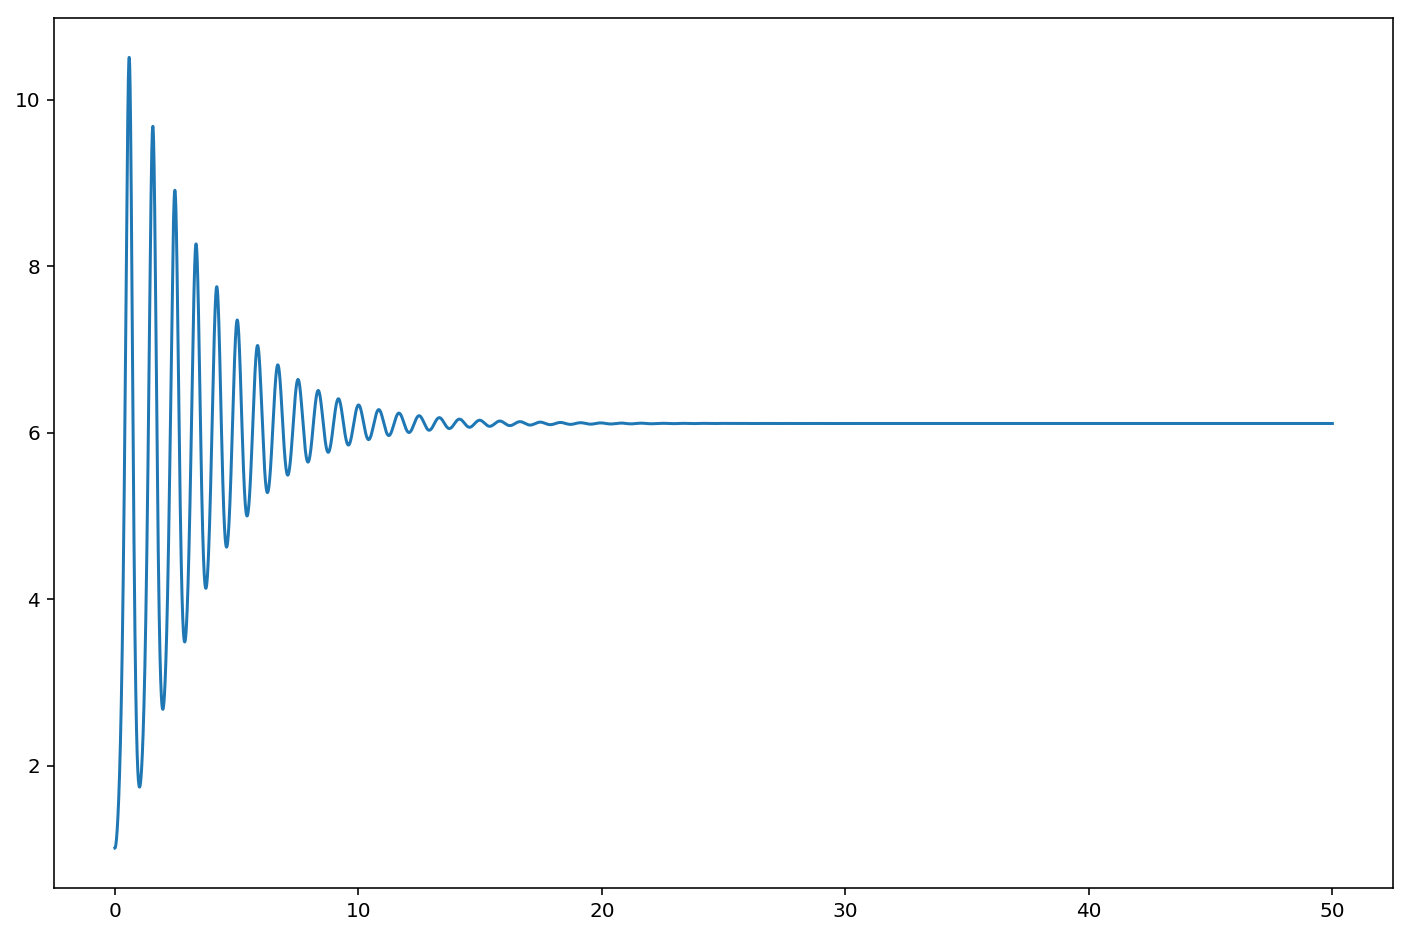

In [71]:
part1_problem2()

In [85]:
def part1_problem3():
    starting = [(np.sqrt(72), np.sqrt(72), 27),
                (-np.sqrt(72), -np.sqrt(72), 27),
                (0, 0, 0)]
    
    lorenz = lambda rho, sigma, beta: \
                lambda x: np.array([sigma * (x[1] - x[0]), 
                                    rho * x[0] - x[1] - x[0] * x[2],
                                    -beta * x[2] + x[0] * x[1]])
    
    # x is 3 dim
    for pt in starting:
        t, coords = modified_euler(pt, 0, 50, lorenz(28, 10, 8/3), 1/1000)
        x = coords[:,0]
    
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.plot(t, x)

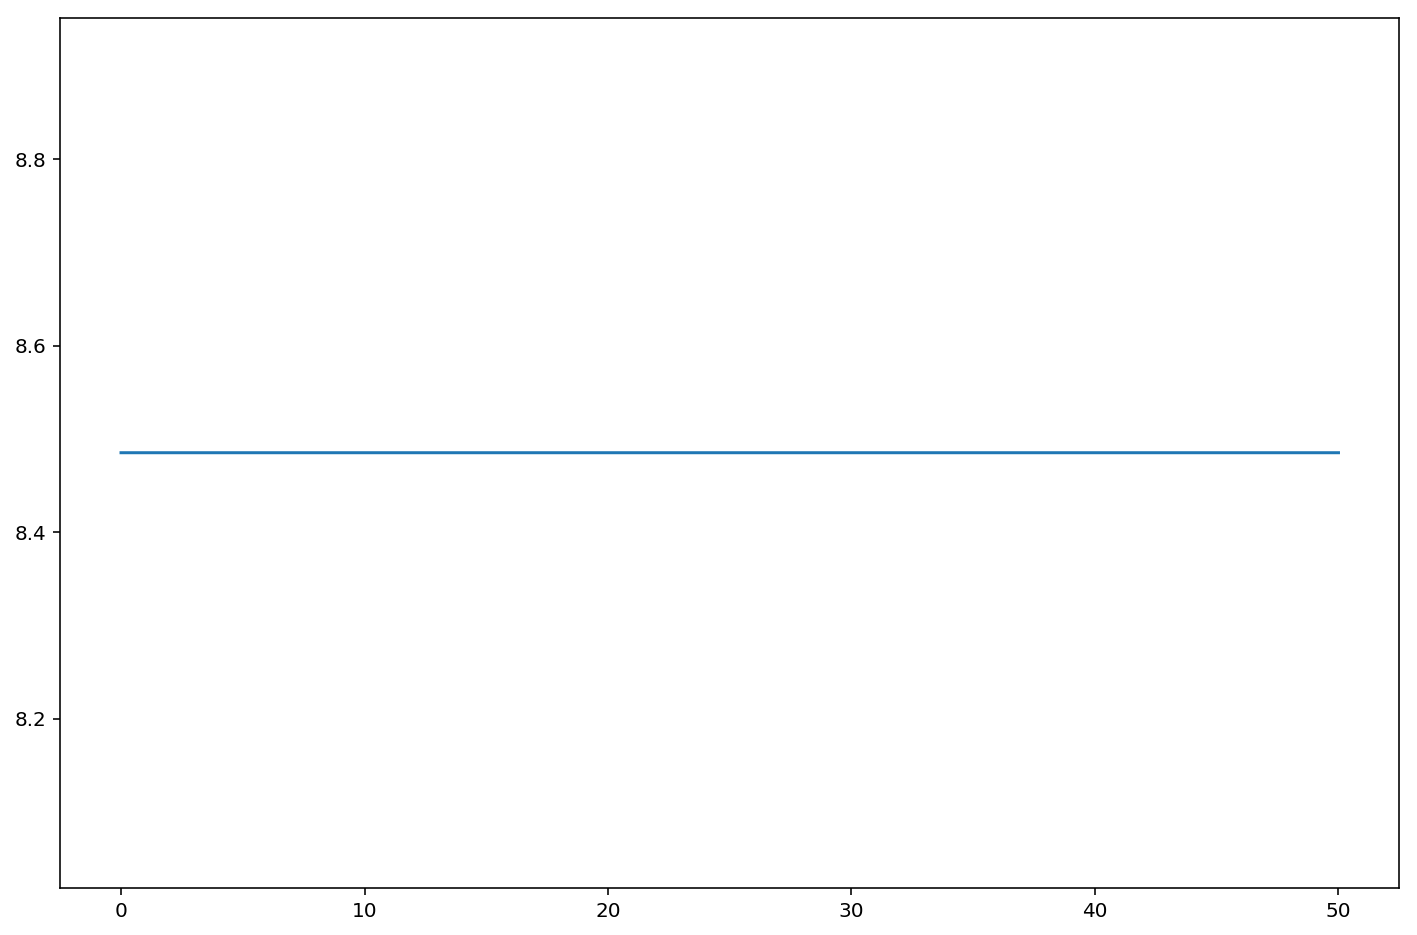

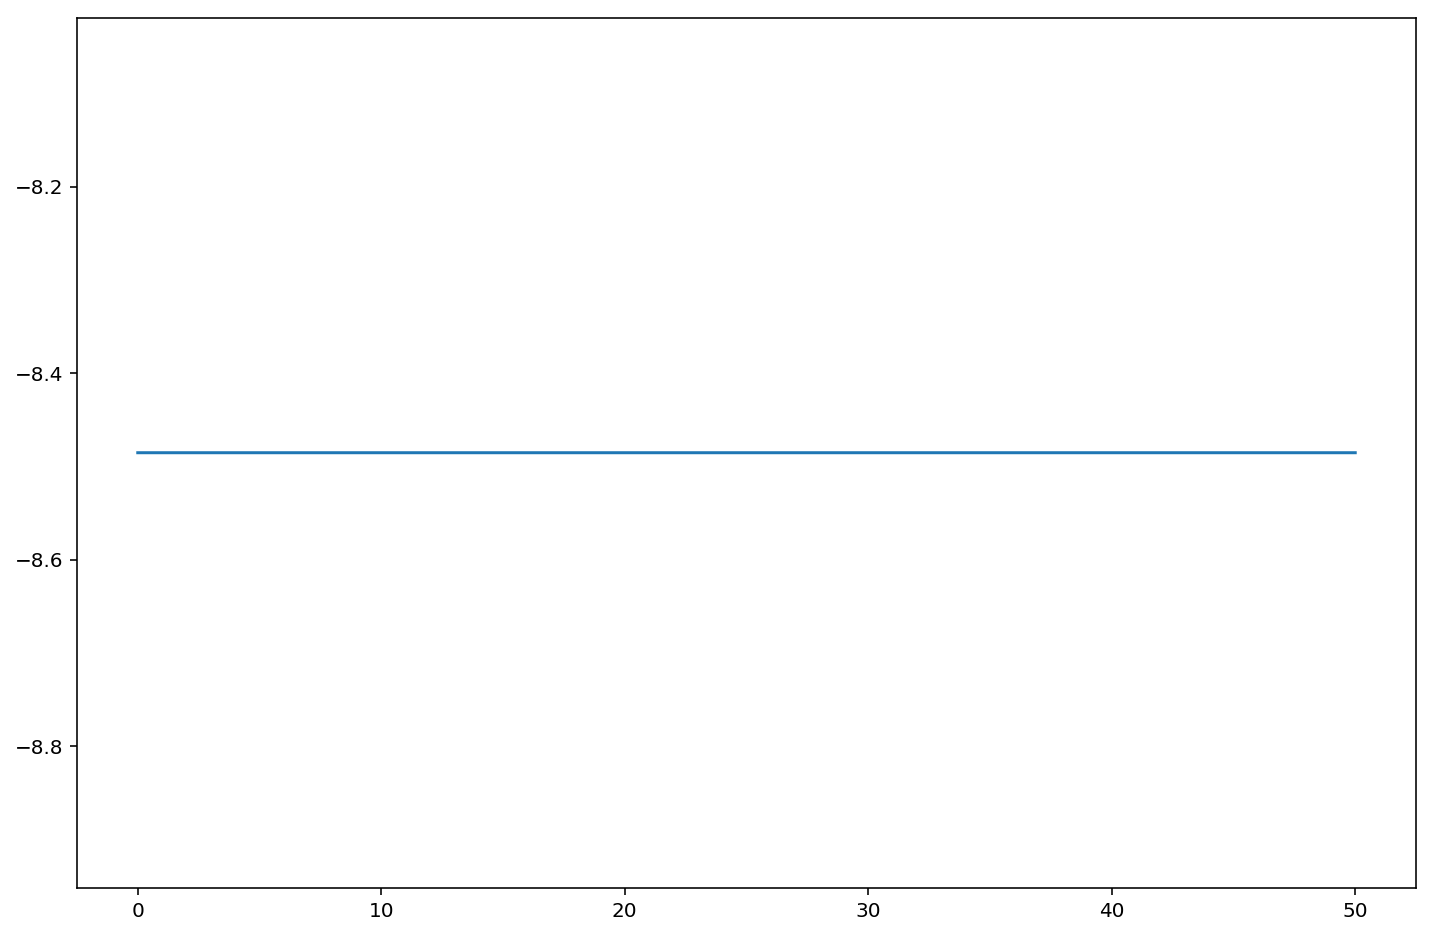

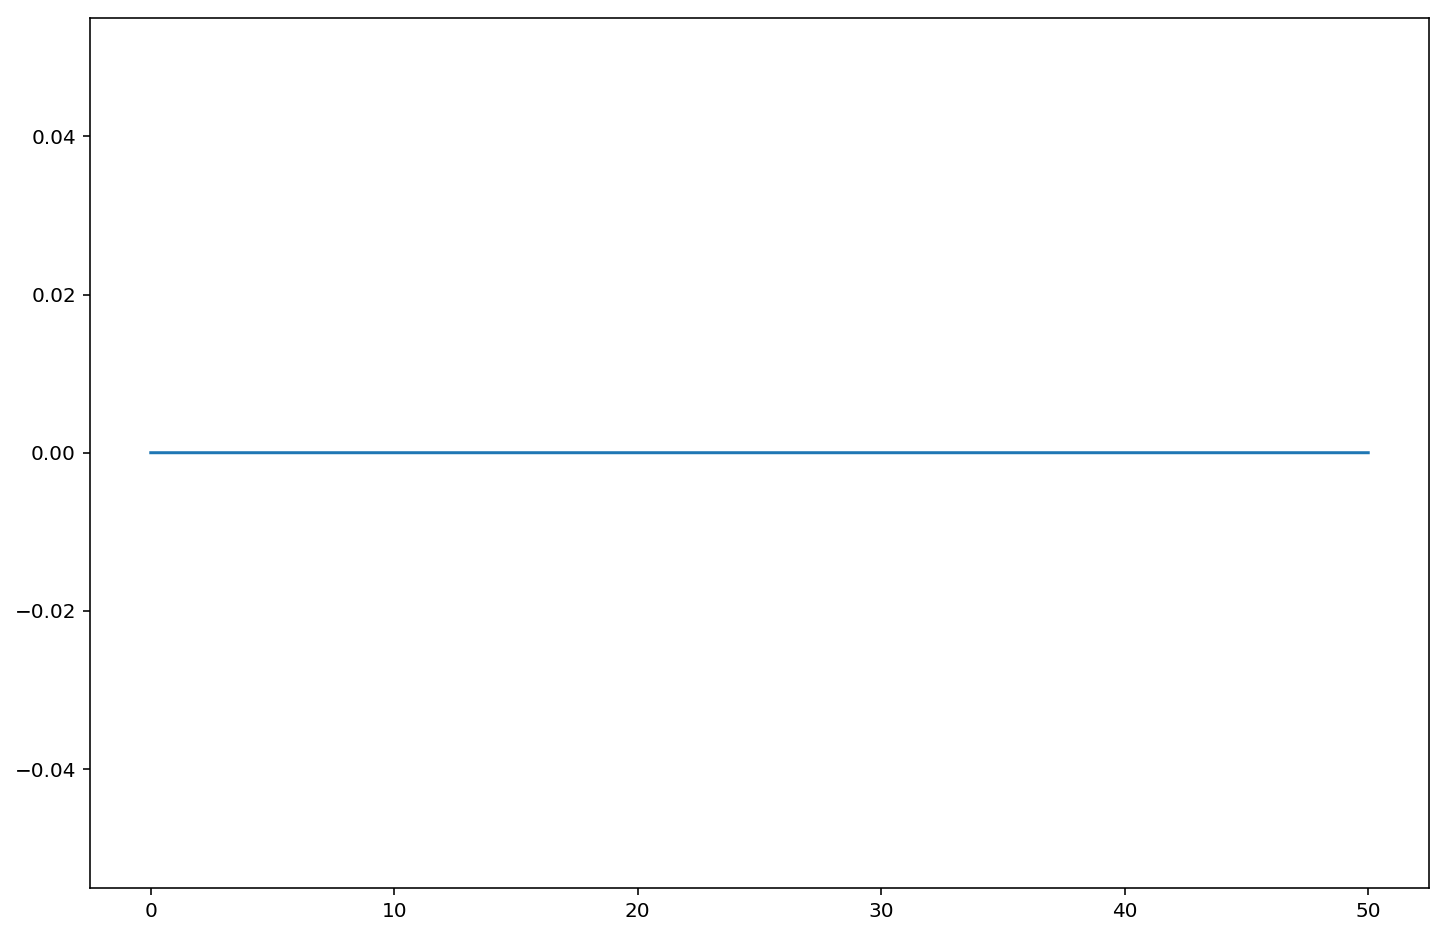

In [86]:
part1_problem3()

In [87]:
def part1_problem4():
    lorenz = lambda rho, sigma, beta: \
                lambda x: np.array([sigma * (x[1] - x[0]), 
                                    rho * x[0] - x[1] - x[0] * x[2],
                                    -beta * x[2] + x[0] * x[1]])
    starting = (1, 1, 8)
    t, coords = modified_euler(starting, 0, 4000, lorenz(28, 10, 8/3), 1/1000)

    x = coords[:,0]
    z = coords[:,2]
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(x, z)

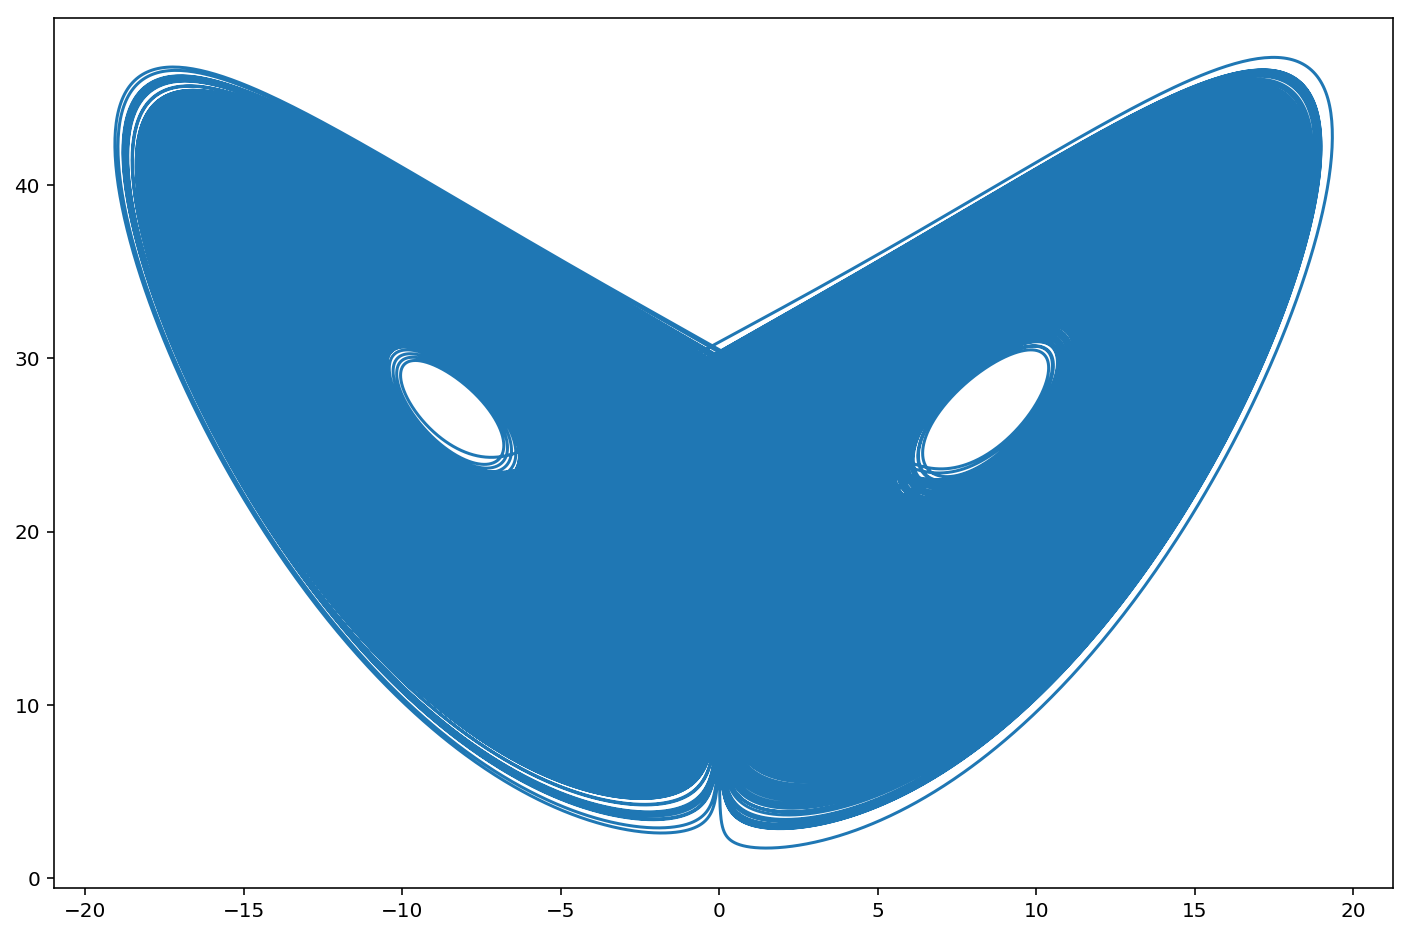

In [88]:
part1_problem4()

In [136]:
def part1_problem5():
    lorenz = lambda rho, sigma, beta: \
                lambda x: np.array([sigma * (x[1] - x[0]), 
                                    rho * x[0] - x[1] - x[0] * x[2],
                                    -beta * x[2] + x[0] * x[1]])
    starting = (1, 1, 8)
    t, coords = modified_euler(starting, 0, 4000, lorenz(28, 10, 8/3), 1/1000)
    
    z_prev = coords[0][2]
    
    xs = []
    ys = []
    above = []
    
    for pt in coords[1:]:
        x, y, z = pt
        if z < 28 and z_prev > 28:
            ys.append(y)
            xs.append(x)
            above.append(int(y > x))
        z_prev = z
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(xs, ys, c=above[1:] + [1], s=1)

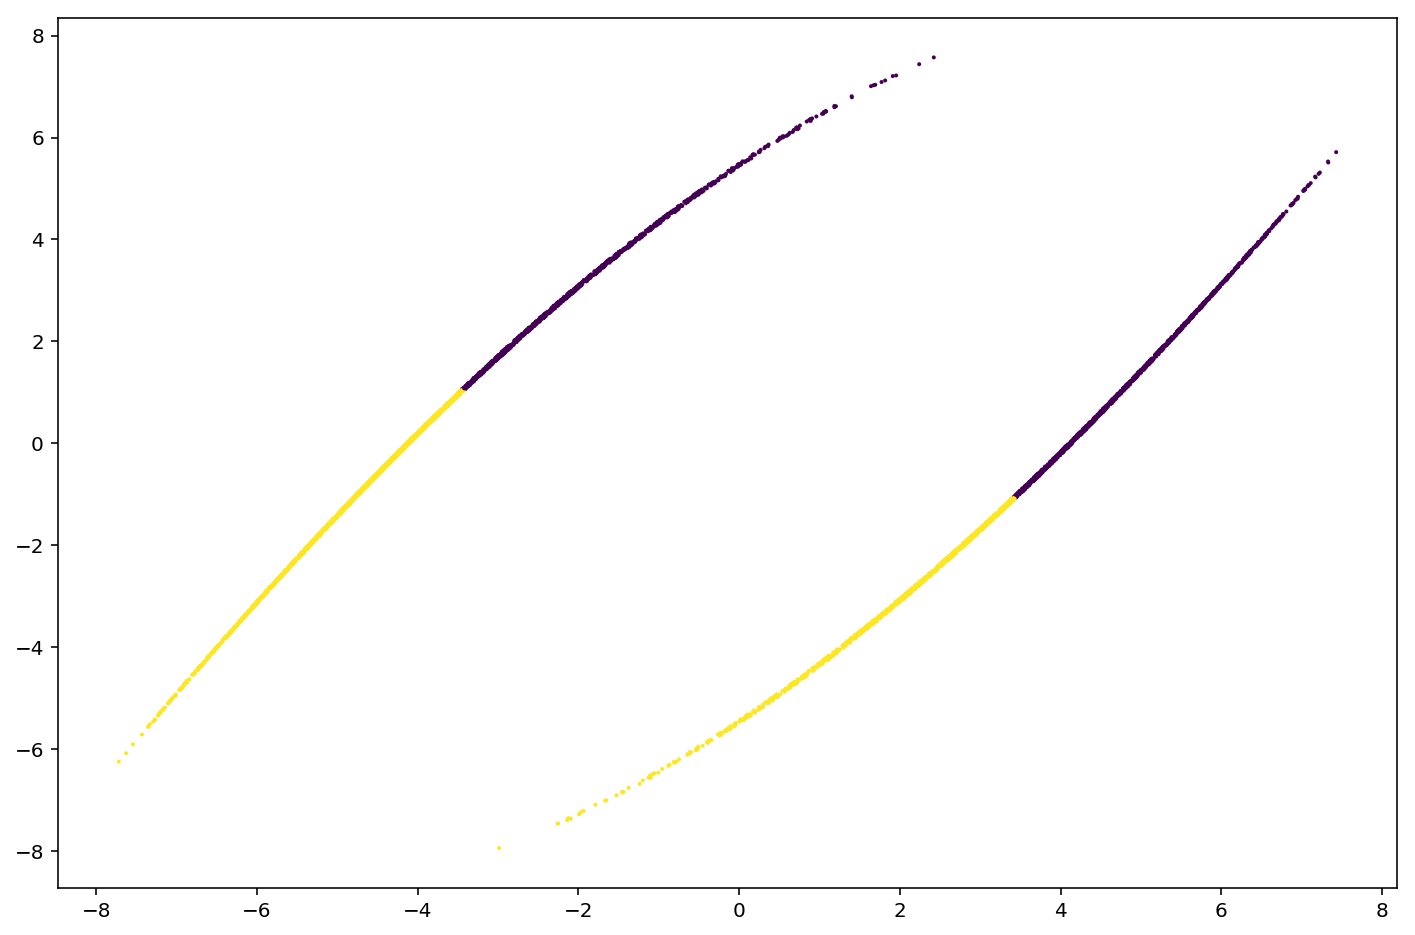

In [137]:
part1_problem5()

In [163]:
def rossler(a=0.2, b=0.2, c=5.7):
    def system(u): 
        x, y, z = u
        return np.array([-y - z,
                         x + a*y,
                         b + z*(x-c)])
    return system

In [194]:
from mpl_toolkits.mplot3d import Axes3D

def plot3d(*args, **kwargs):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(*args, **kwargs)

def part2_problem1(b=1.55):
    system = rossler(b=b)
    start = (1, 1, 0)
    
    ts, trajectory = modified_euler(start, 0, 1500, system, 1/200)
    
    # get first index > 1000
    index_1000 = np.argmax(ts > 1000)

    # coords to lists, get trajectory for t > 1000
    xs, ys, zs = zip(*trajectory[index_1000:])
    
    plot3d(xs, ys, zs)

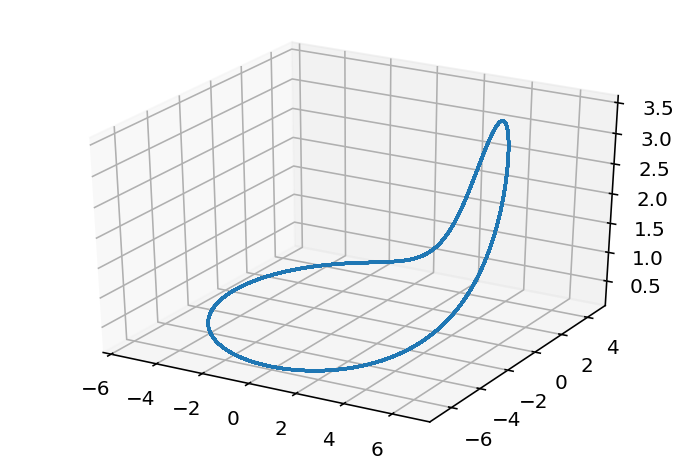

In [195]:
part2_problem1()

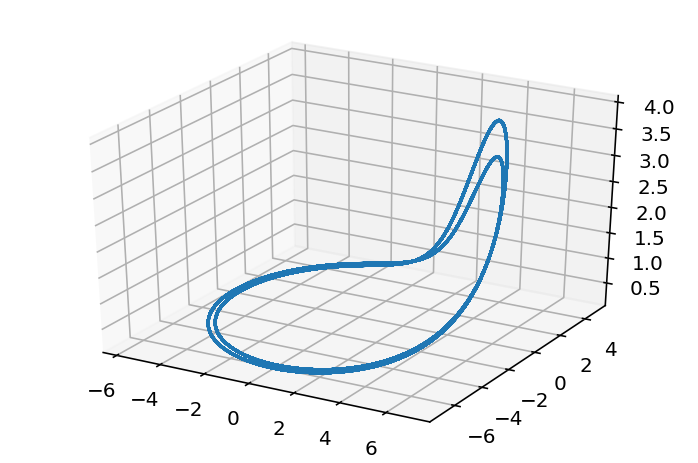

In [196]:
part2_problem1(1.42)

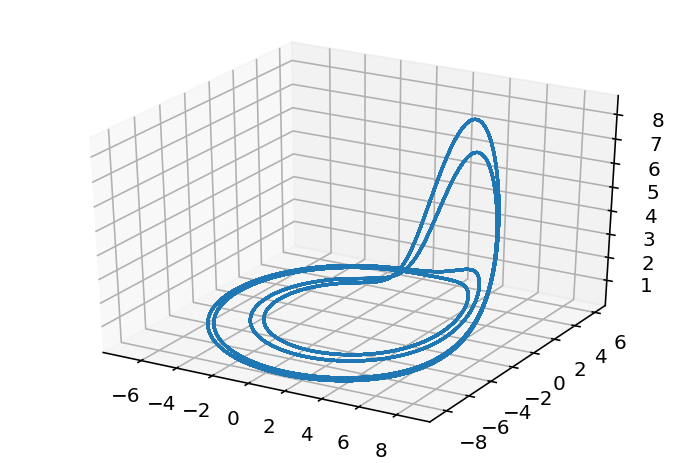

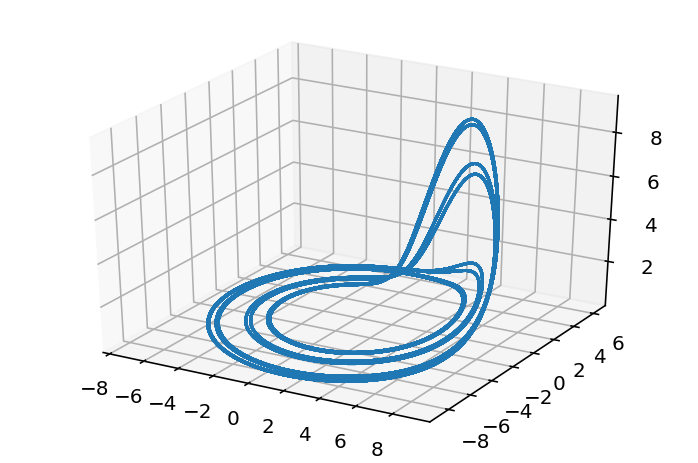

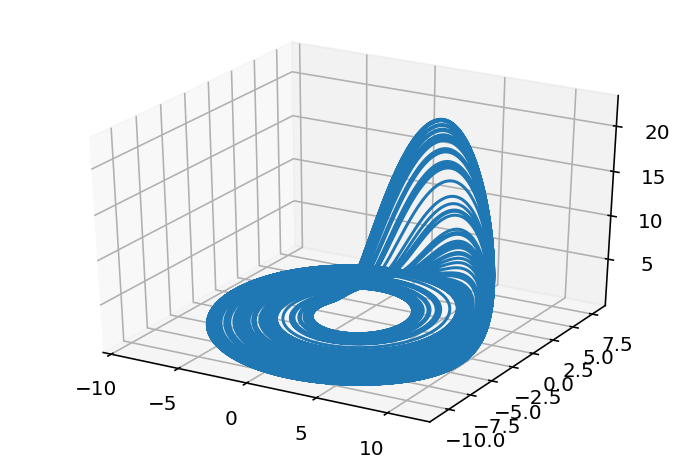

In [197]:
for b in [0.8, 0.72, 0.2]:
    part2_problem1(b)

In [263]:
# what's a return map?

def plot(*args, **kwargs):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca()
    ax.plot(*args, **kwargs)

def scatter(*args, **kwargs):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca()
    ax.scatter(*args, **kwargs)
    
def part2_problem2(b=1.55):
    system = rossler(b=b)
    start = (1, 1, 0)
    
    ts, trajectory = modified_euler(start, 0, 1500, system, 1/1000)
    
    x_prev = trajectory[0][0]
    ys_crossing = []
    
    for pt in trajectory[1:]:
        x, y, z = pt
        
        if x_prev > 0 and x < 0:
            ys_crossing.append(y)
            
            if len(ys_crossing) >= 500:
                break
        
        x_prev = x
        
    scatter(range(len(ys_crossing)), ys_crossing, s=1)

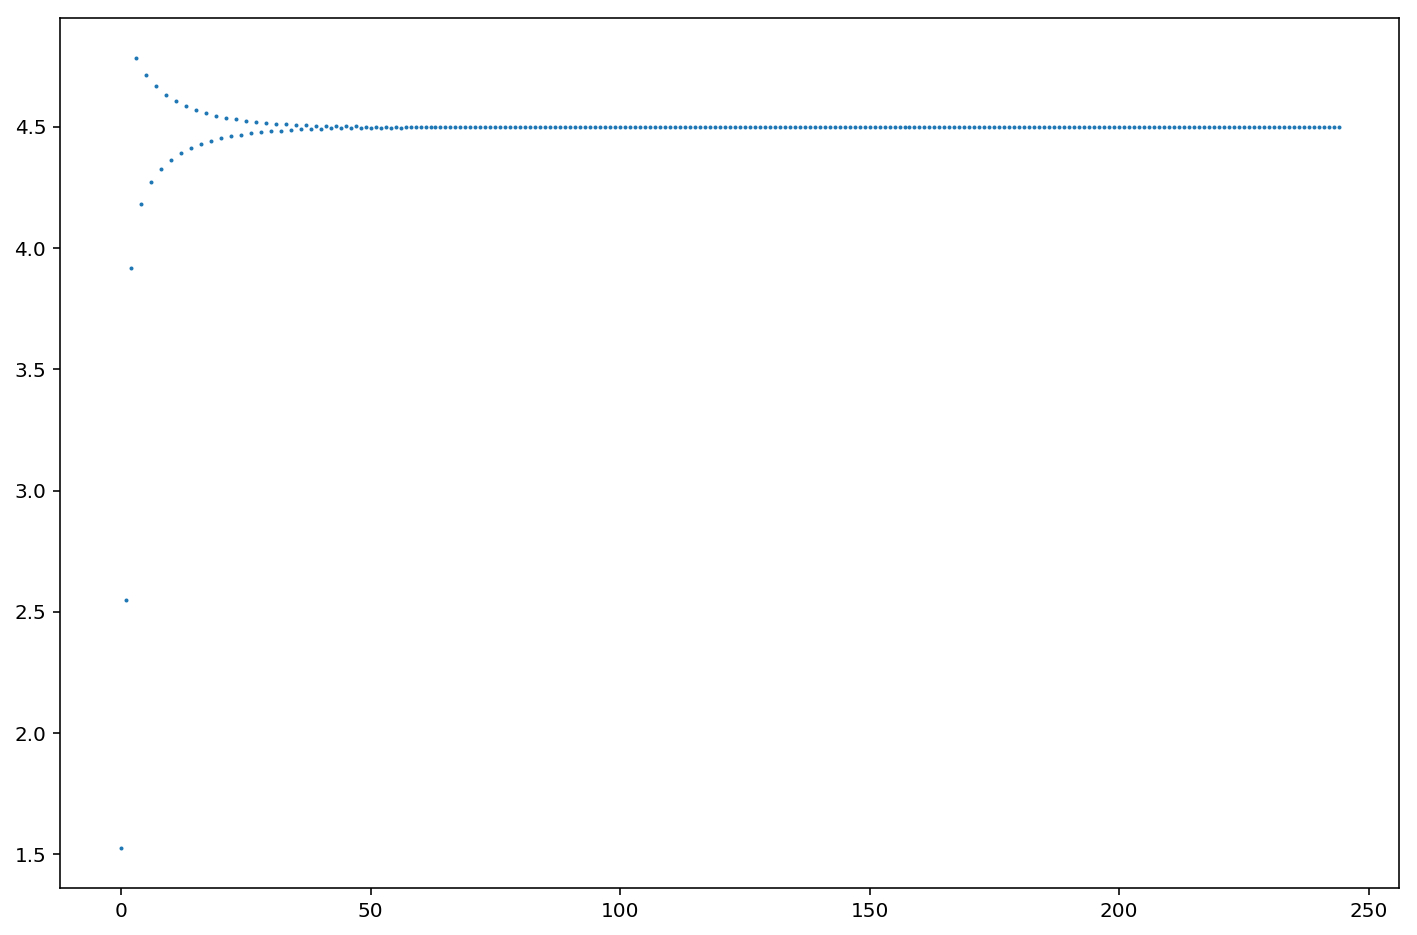

In [262]:
part2_problem2()

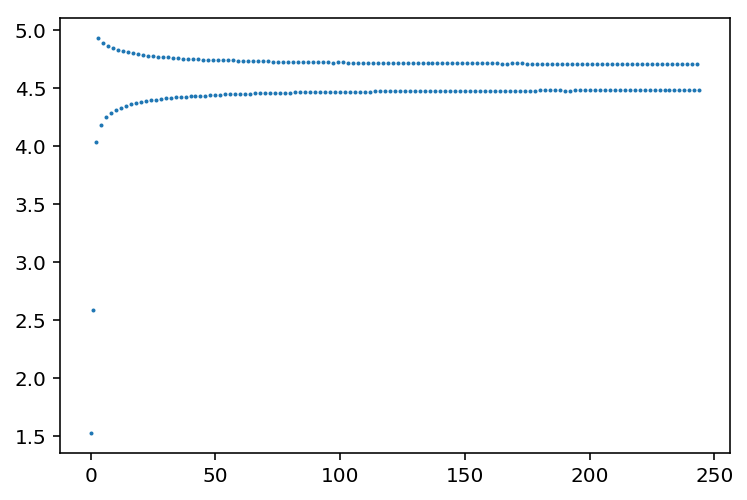

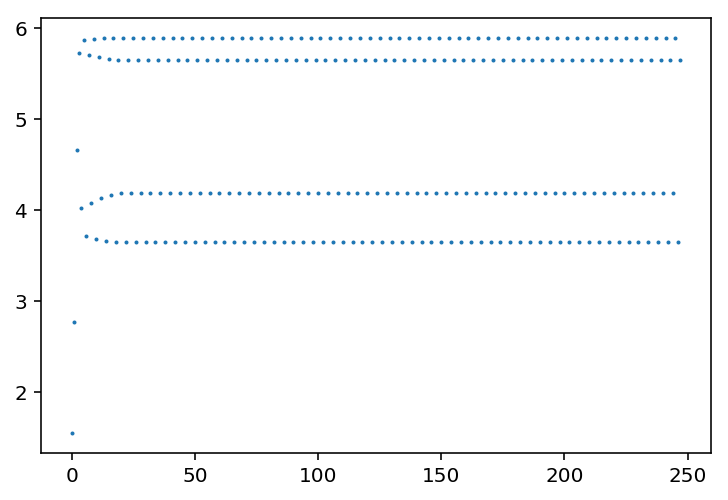

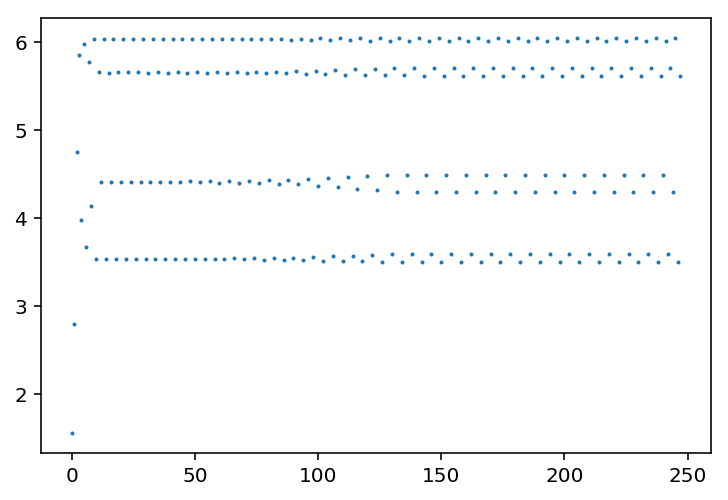

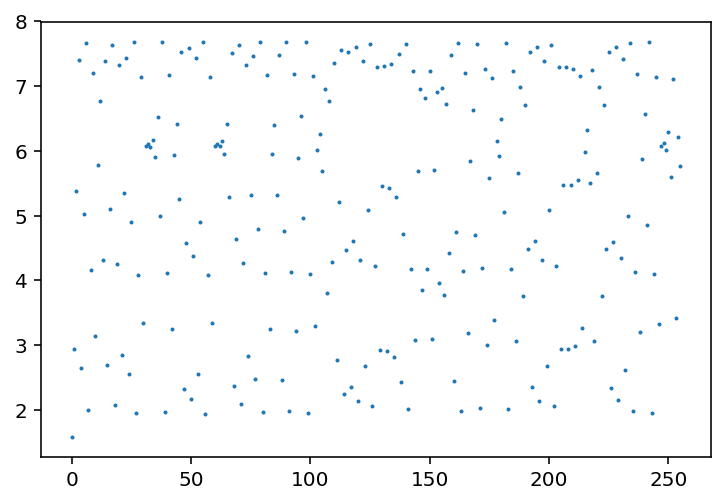

In [225]:
for b in [1.42, 0.8, 0.72, 0.2]:
    part2_problem2(b)

In [268]:
def find_crossing_y(trajectory):
    x_prev = trajectory[0][0]
    ys_crossing = []

    for pt in trajectory[1:]:
        x, y, z = pt

        if x_prev > 0 and x < 0:
            ys_crossing.append(y)
            
            if len(ys_crossing) > 500:
                return ys_crossing

        x_prev = x
    
    return ys_crossing
    

def part2_problem3():
    bs = []
    ys = []
    
    for b in np.linspace(0.2, 2, 500):
        system = rossler(b=b)
        start = (1, 1, 0)
    
        ts, trajectory = modified_euler(start, 0, 1500, system, 1/10)
        
        ys_crossing = find_crossing_y(trajectory)[100:]
        ys.extend(ys_crossing)
        bs.extend([b] * len(ys_crossing))
    
    plot(bs, ys, 'o', markersize=1)

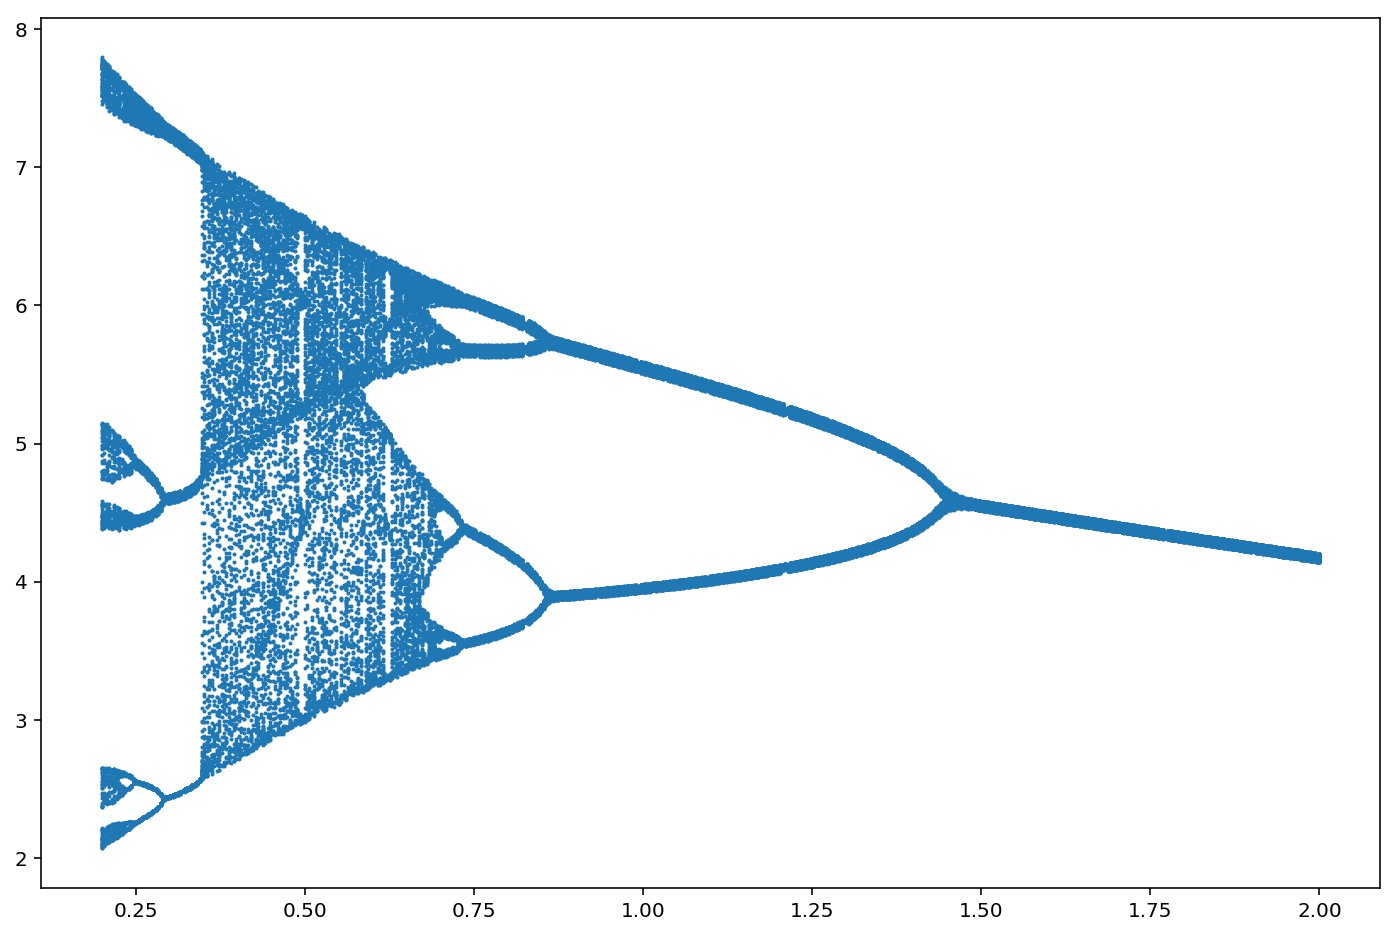

In [269]:
part2_problem3()